In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [30]:
### drop day, month, year
df.drop(['day','month', 'year'], axis=1, inplace=True)

In [31]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [32]:
df['Classes'].value_counts()

Classes
not fire       60
fire           53
fire            4
fire            2
not fire        2
not fire        1
Name: count, dtype: int64

In [33]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0,1)

In [34]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [35]:
df['Classes'].value_counts()

Classes
0    63
1    59
Name: count, dtype: int64

In [36]:
## independent and dependent features
x = df.drop('FWI', axis=1)
y =df['FWI']

In [37]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [38]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
117    1.7
118    4.1
119    0.9
120    0.1
121    0.1
Name: FWI, Length: 122, dtype: float64

In [39]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [40]:
x_train.shape, x_test.shape

((91, 11), (31, 11))

In [41]:
## Feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.680264,-0.135288,-0.436188,0.750207,0.545003,0.533488,0.702282,0.544498,0.540134,NaN
RH,-0.680264,1.000000,0.229070,0.320706,-0.666734,-0.324957,-0.306356,-0.580488,-0.318486,-0.378169,NaN
Ws,-0.135288,0.229070,1.000000,0.364243,-0.139364,0.081886,0.143241,0.029944,0.106211,-0.064097,NaN
Rain,-0.436188,0.320706,0.364243,1.000000,-0.527692,-0.261946,-0.299346,-0.377590,-0.274212,-0.360694,NaN
FFMC,0.750207,-0.666734,-0.139364,-0.527692,1.000000,0.623398,0.606266,0.811590,0.618525,0.775019,NaN
DMC,0.545003,-0.324957,0.081886,-0.261946,0.623398,1.000000,0.973720,0.733634,0.996387,0.622460,NaN
DC,0.533488,-0.306356,0.143241,-0.299346,0.606266,0.973720,1.000000,0.730361,0.988647,0.610661,NaN
ISI,0.702282,-0.580488,0.029944,-0.377590,0.811590,0.733634,0.730361,1.000000,0.736173,0.841128,NaN
BUI,0.544498,-0.318486,0.106211,-0.274212,0.618525,0.996387,0.988647,0.736173,1.000000,0.620282,NaN
Classes,0.540134,-0.378169,-0.064097,-0.360694,0.775019,0.622460,0.610661,0.841128,0.620282,1.000000,NaN


<Axes: >

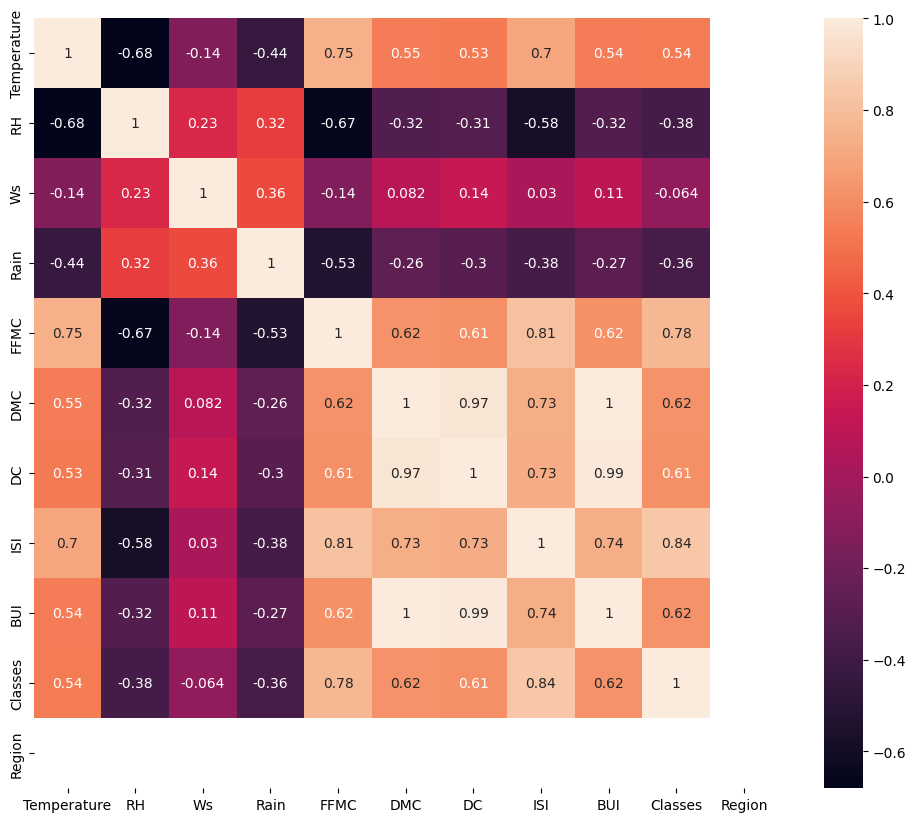

In [42]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)

In [43]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [44]:
correlation(x_train, 0.99)

{'BUI'}

In [45]:
###  Threshold -- Domain expertise
corr_features = correlation(x_train, 0.75)

In [46]:
## drop feature when correlation is more than 0.85
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
x_train.shape, x_test.shape

((91, 6), (31, 6))

### Feature Scaling or Standardization

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)



In [50]:
x_train_scaled

array([[-0.73323558,  1.90224414, -1.01880763, -0.06007241, -0.97491305,
         0.        ],
       [ 1.17317692, -1.58553965, -1.01880763, -0.2232542 ,  0.2313547 ,
         0.        ],
       [ 0.21997067, -0.57591803,  0.80622178, -0.30484509, -0.41083101,
         0.        ],
       [-1.68644182,  1.16797387,  1.90123943,  2.02049531, -0.86209664,
         0.        ],
       [-1.05097099,  1.07619008,  1.90123943,  6.50799431, -0.36744009,
         0.        ],
       [ 1.49091234, -1.40197209,  0.07621002, -0.34564053,  2.14055545,
         0.        ],
       [-0.73323558, -0.02521533,  1.17122767,  0.06231392, -0.90548757,
         0.        ],
       [ 1.80864775, -1.49375587,  0.80622178, -0.34564053,  0.26606744,
         0.        ],
       [ 0.8554415 , -0.30056668, -1.01880763, -0.34564053, -0.15916364,
         0.        ],
       [-1.05097099,  0.9844063 , -1.38381351, -0.34564053, -0.2980146 ,
         0.        ],
       [ 0.53770609,  0.89262252,  0.4412159 , -0.

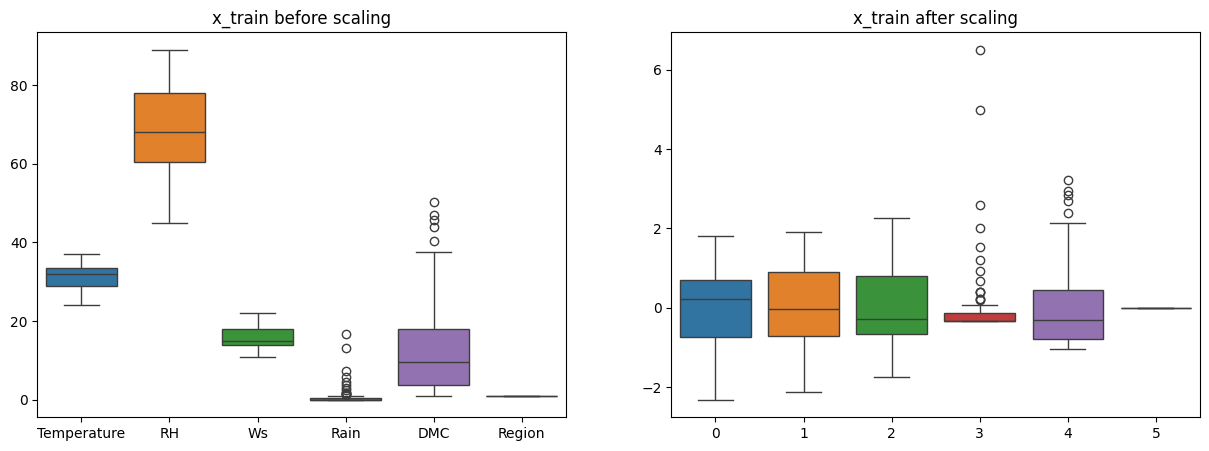

In [54]:
# ### Box Plots to understand effect of standard Scaler
# plt.subplots(figsize=(15,5))
# plt.subplots(1,2,1)
# sns.boxplots(data=x_train)
# plt.title('x_train before scaling')
# plt.subplots(1,2,2)
# sns.boxplots(data=x_train_scaled)
# plt.title('x_train afte scaling')

### Box Plots to understand effect of StandardScaler
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=x_train, ax=ax[0])
ax[0].set_title('x_train before scaling')

sns.boxplot(data=x_train_scaled, ax=ax[1])
ax[1].set_title('x_train after scaling')

plt.show()
